In [203]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, rescale, iradon
from skimage.io import imread

Чтение изображения из файла и его сжатие

In [204]:
image = imread("milkyway.jpg", True)
image = rescale(image, scale=0.4, mode="reflect", channel_axis=None)

In [205]:
def setup_sinogram(step: int) -> tuple[np.ndarray, np.ndarray]:
    # Дискретезация углов [0, 180). Третий параметр - плотность разбиения
    # (количество точек, на которое разбить полуинтервал [0, 180))
    # разбиваем каждые step градусов
    theta = np.linspace(0.0, 180.0, 180 // step, endpoint=False)
    sinogram = radon(image, theta=theta, circle=True)
    return sinogram, theta

In [206]:
def show_original_image():
    plt.title("Исходное изображение")
    plt.imshow(image, cmap=plt.cm.Greys_r)
    plt.show()


def create_sinogram_plot(step: int):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

    # Compute and plot sinogram
    sinogram, theta = setup_sinogram(step)
    ax1.set_title(f"Синограмма\nПреобразования Радона c шагом {step} градусa(ов)")
    ax1.set_xlabel("Угол проекции (градусы)")
    ax1.set_ylabel("Положение проекции (пиксели)")
    ax1.imshow(sinogram, cmap=plt.cm.Greys_r, aspect="auto")

    # Reconstruct and plot
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name="ramp")
    ax2.set_title(f"Реконструкция c шагом {step} градусa(ов)")
    ax2.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

    fig.tight_layout()
    plt.show()

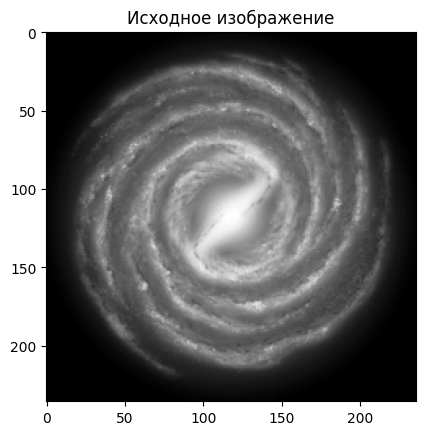

c:\Users\PheeZz\AppData\Local\pypoetry\Cache\virtualenvs\reverse-tasks-2T2CRwV6-py3.11\Lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


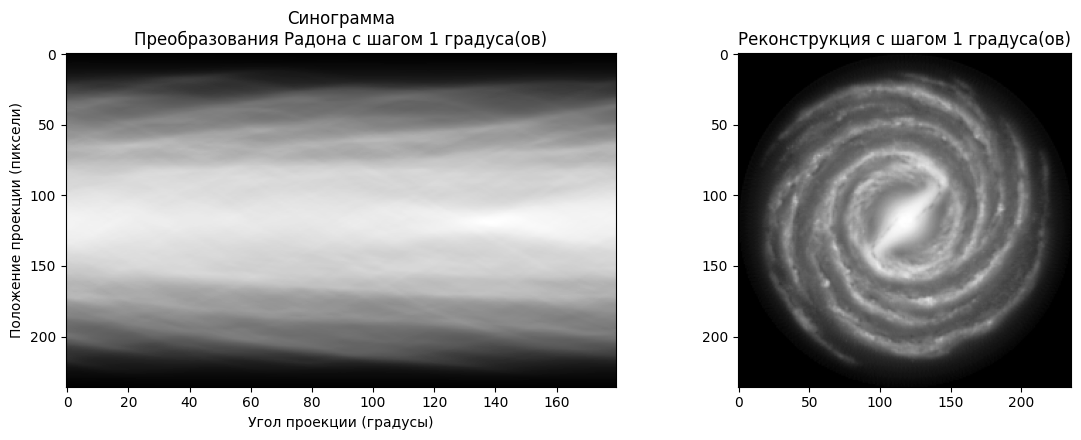

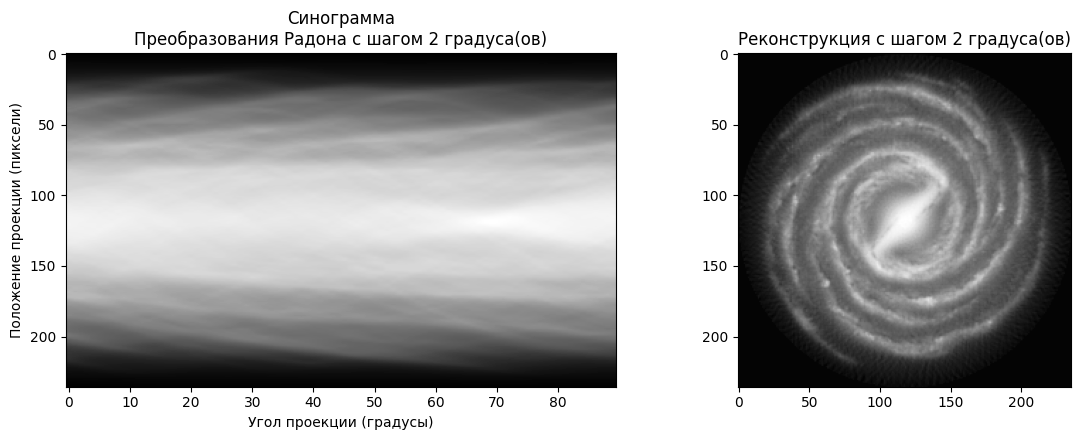

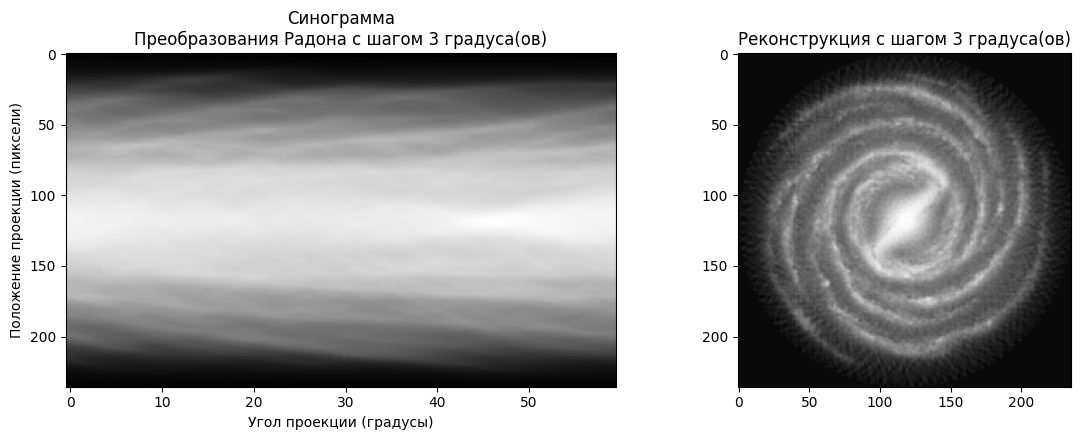

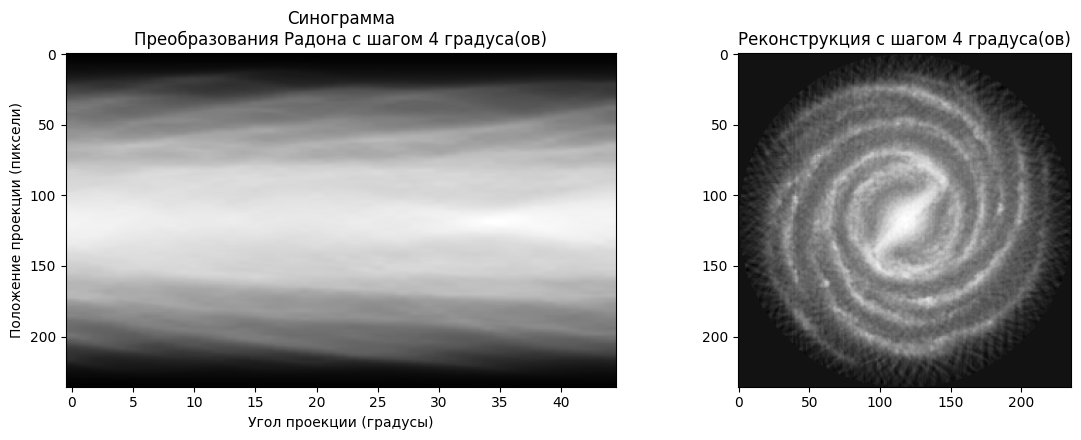

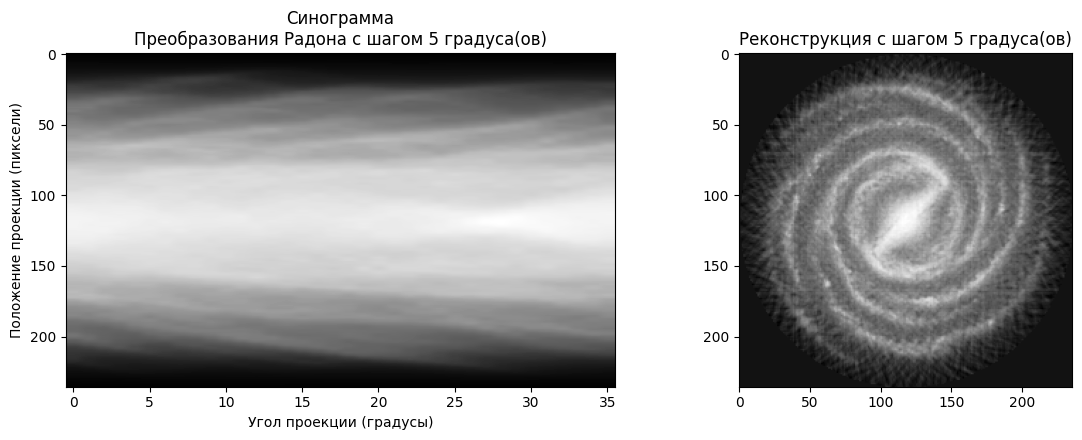

In [207]:
show_original_image()
for step in range(1, 6):
    create_sinogram_plot(step)